In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn
DRAFTPATH = '/home/cosinga/hicolor_draft/figures/%s'
def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)

def rgba(color, alpha):
    return mpl.colors.to_rgba(color, alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'

In [2]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
print(ds.getAttrs())
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'
OBSBIAS = r"b$_{\mathrm{HI, opt}}$ (k) = $\sqrt{\rm{P}_{\rm{HI}} (\rm{k}) / \rm{P}_{\mathrm{opt}} (k)}$"
ds.tickArgs({'direction':'in', 'labelsize':14})
ds.legendArgs({'frameon':False, 'loc':'upper right', 'fontsize':14}, slc = (0,0))
ds.axisLabelArgs('both', {'fontsize':16})
ds.figArgs({'dpi':400})
ds.rowLabelArgs(pos = [0.05, 0.05], txtkw = {'fontsize':16, 'ha':'left', 'va':'bottom'})
ds.colLabelArgs(pos = [0.5, 0.95], txtkw = {'fontsize':16, 'ha':'center', 'va':'top'})
ds.axisArgs({'xscale':'log', 'yscale':'log', 'xlim':[0.11866199299595938, 20]})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['HI $\\times$ Blue Bias', 'HI $\\times$ Red Bias', 'HI $\\times$ Galaxy Bias'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('color', 'resolved', {'color':'gray'})

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


# HI-galaxy Obs. Bias Color Comparison

The row values for space: ['real', 'redshift']
The column values for snapshot: [99, 67]


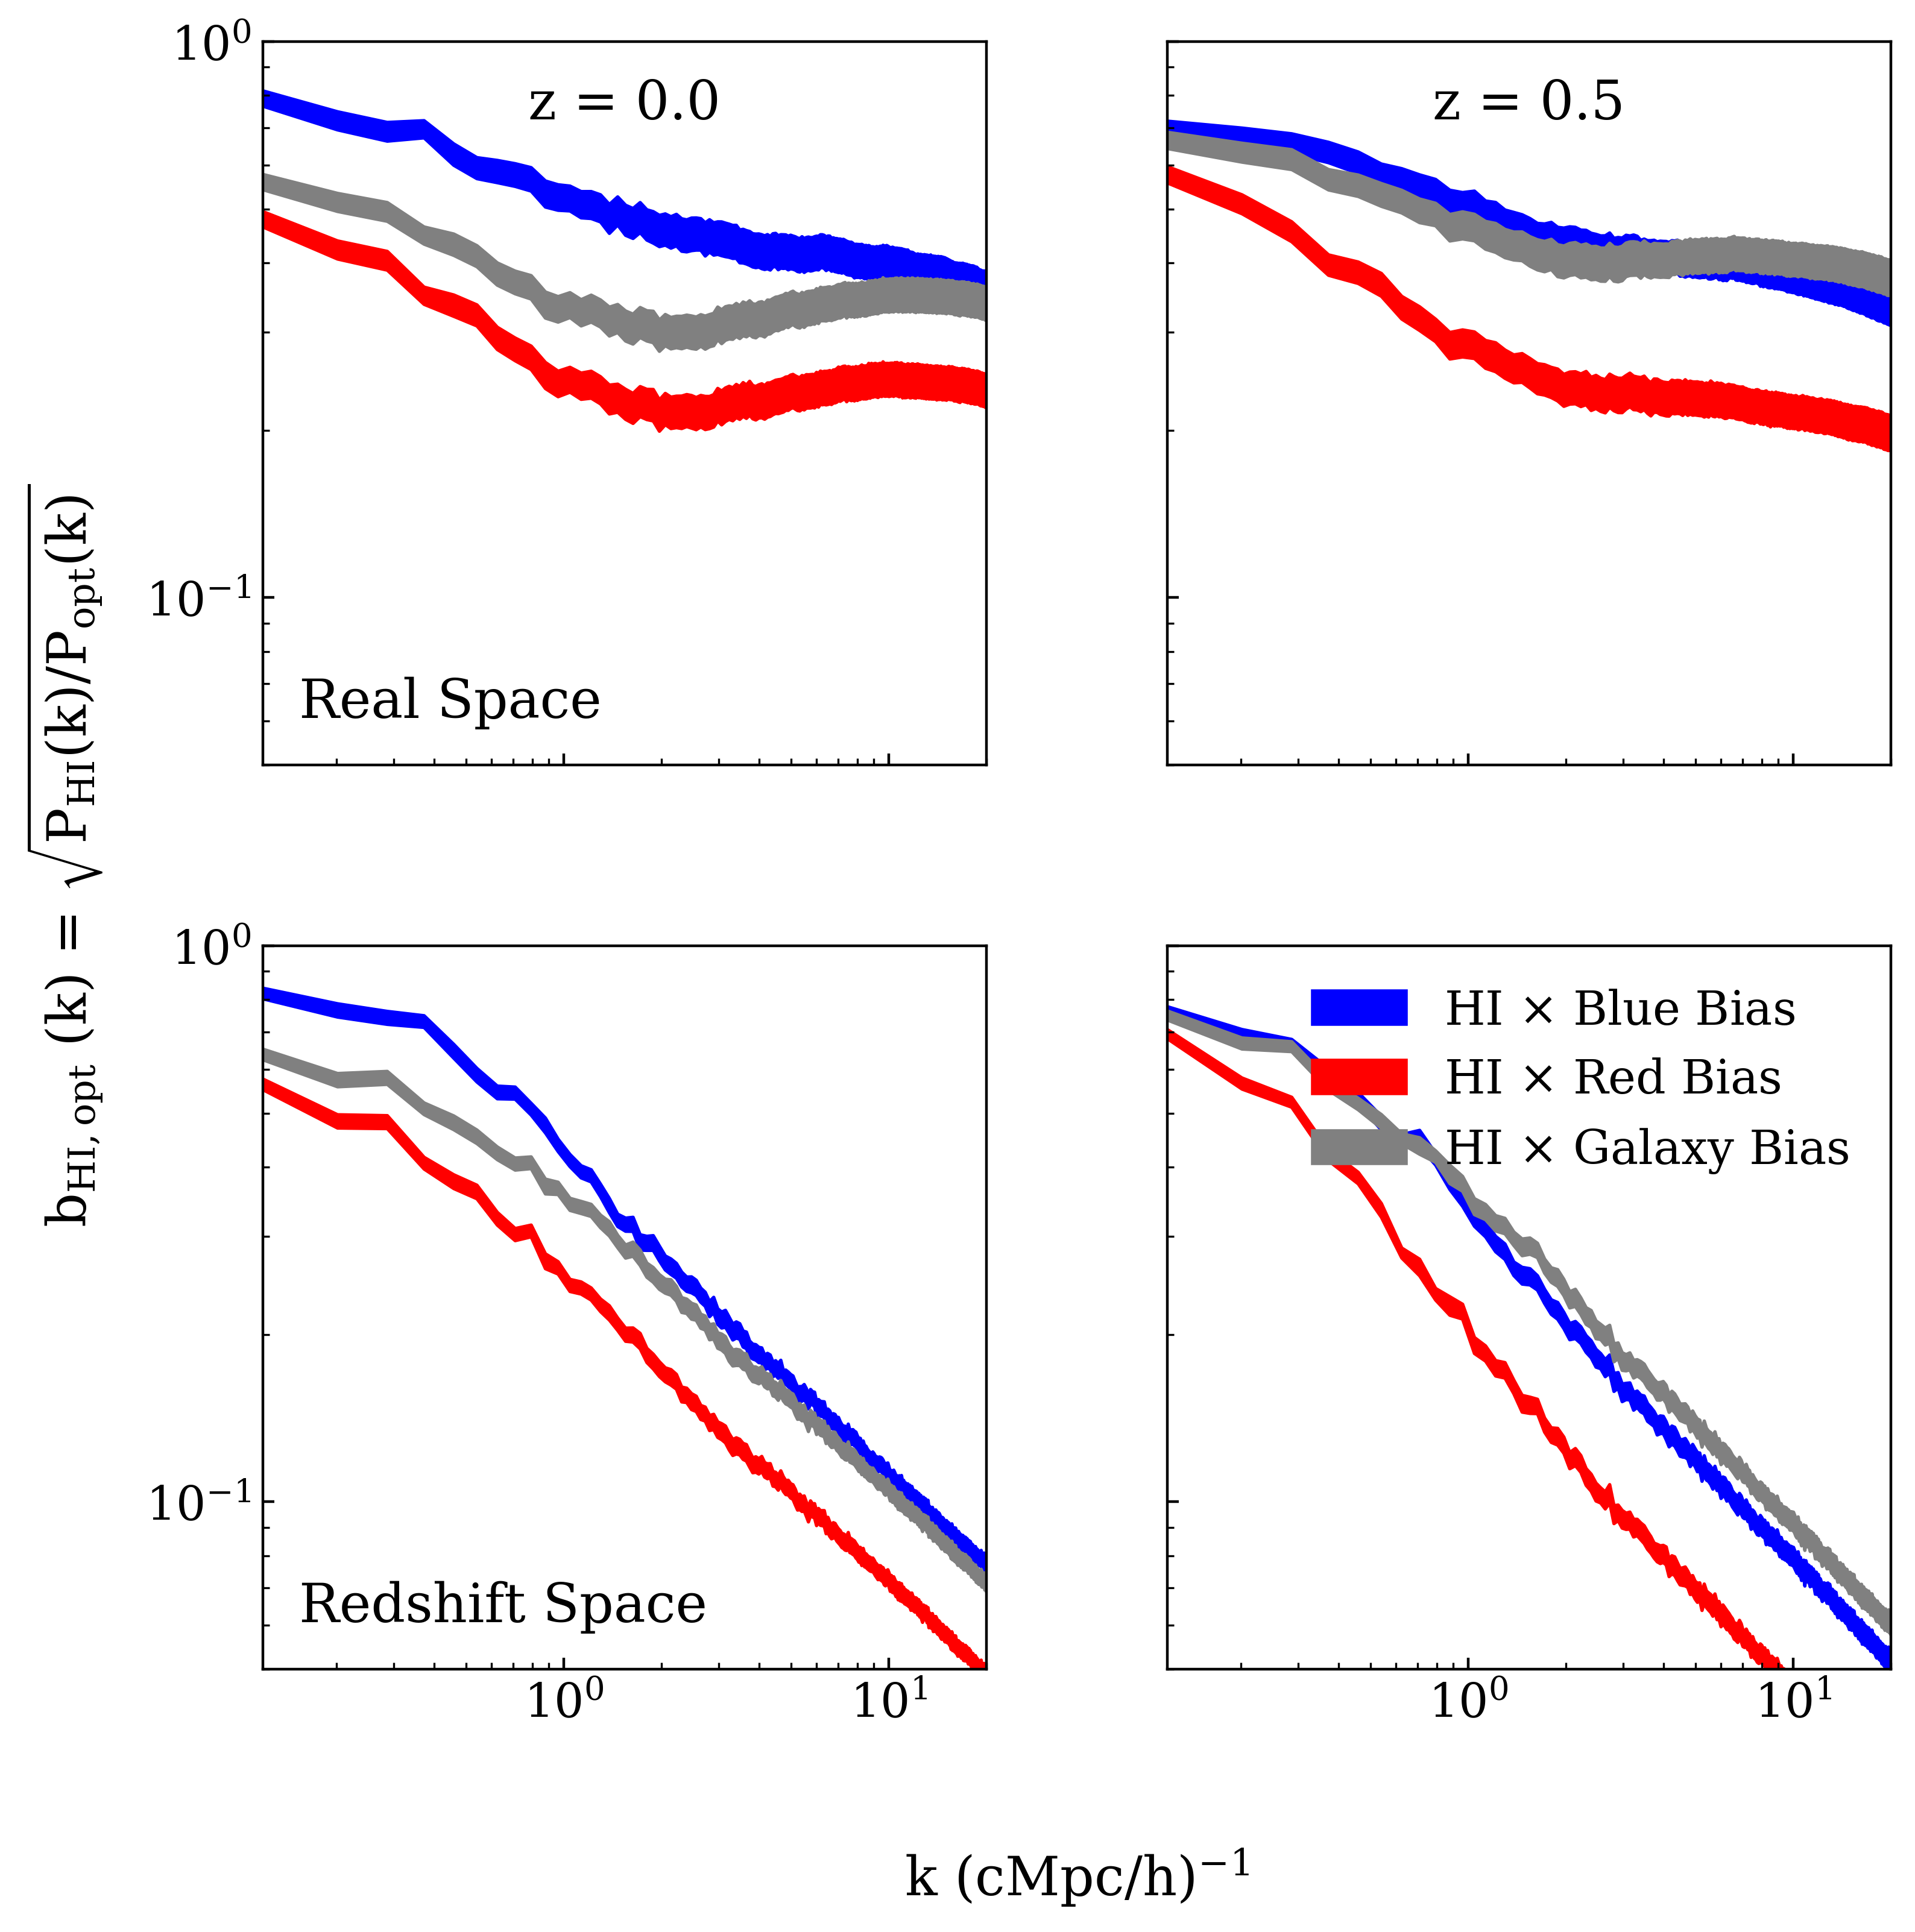

In [3]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67], 'space':['real', 'redshift'],
     'path':'fiducial', 'denominator':'galaxy'}
fg = ds.figrid('color', 'space', 'snapshot', ip)
fg.autoFill()


fg.setXLabel(XLAB)
fg.setYLabel(OBSBIAS)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5e-2, 1)})
fg.legendArgs({}, (1,1))
fg.plot()

The row values for : ['no key found']
The column values for snapshot: [99, 67, 50, 40, 33]


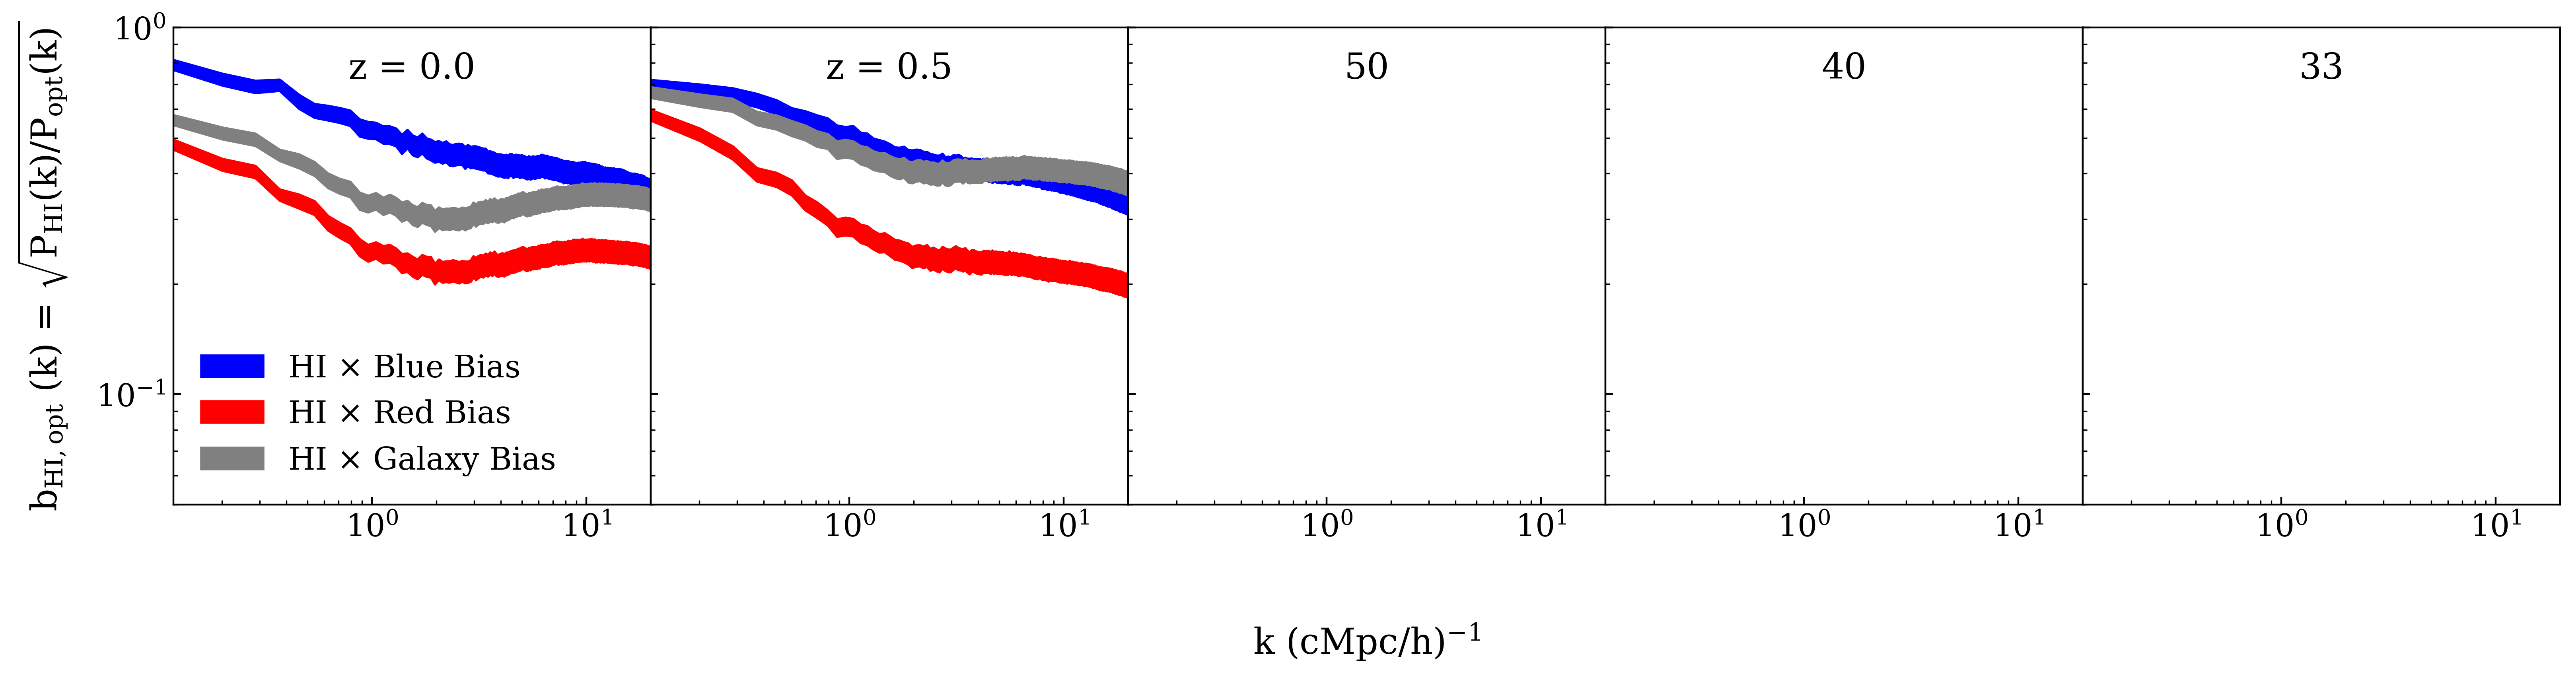

In [4]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 'simname': 'tng100',
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'sim_resolution':'high', 
      'censat':'no key found', 'mas':'CICW', 'color': ['red', 'blue', 'resolved'],
      'post_process':'obs_bias', 'snapshot':[99, 67, 50, 40, 33], 'space':'real',
     'path':'fiducial', 'denominator':'galaxy'}
fg = ds.figrid('color', '', 'snapshot', ip, figrid_args = {'wspace':0})
fg.autoFill()
fg.setXLabel(XLAB)
fg.setYLabel(OBSBIAS)
fg.setDefaultTicksParams()
fg.axisArgs({'ylim':(5e-2, 1)})
fg.legendArgs({'loc':'lower left'}, (0, 0))
fg.rowLabelArgs(pos = [0.5, 0.95], textKwargs = {'ha':'center', 'va':'top', 'fontsize':16})
fg.plot()
fg.save('HI-galaxy_bias_color_snapshotR.png')
fg.save(DRAFTPATH%'HI-galaxy_obsbias_color_snapshotR.pdf')

The row values for : ['no key found']
The column values for color: ['red', 'blue', 'resolved']


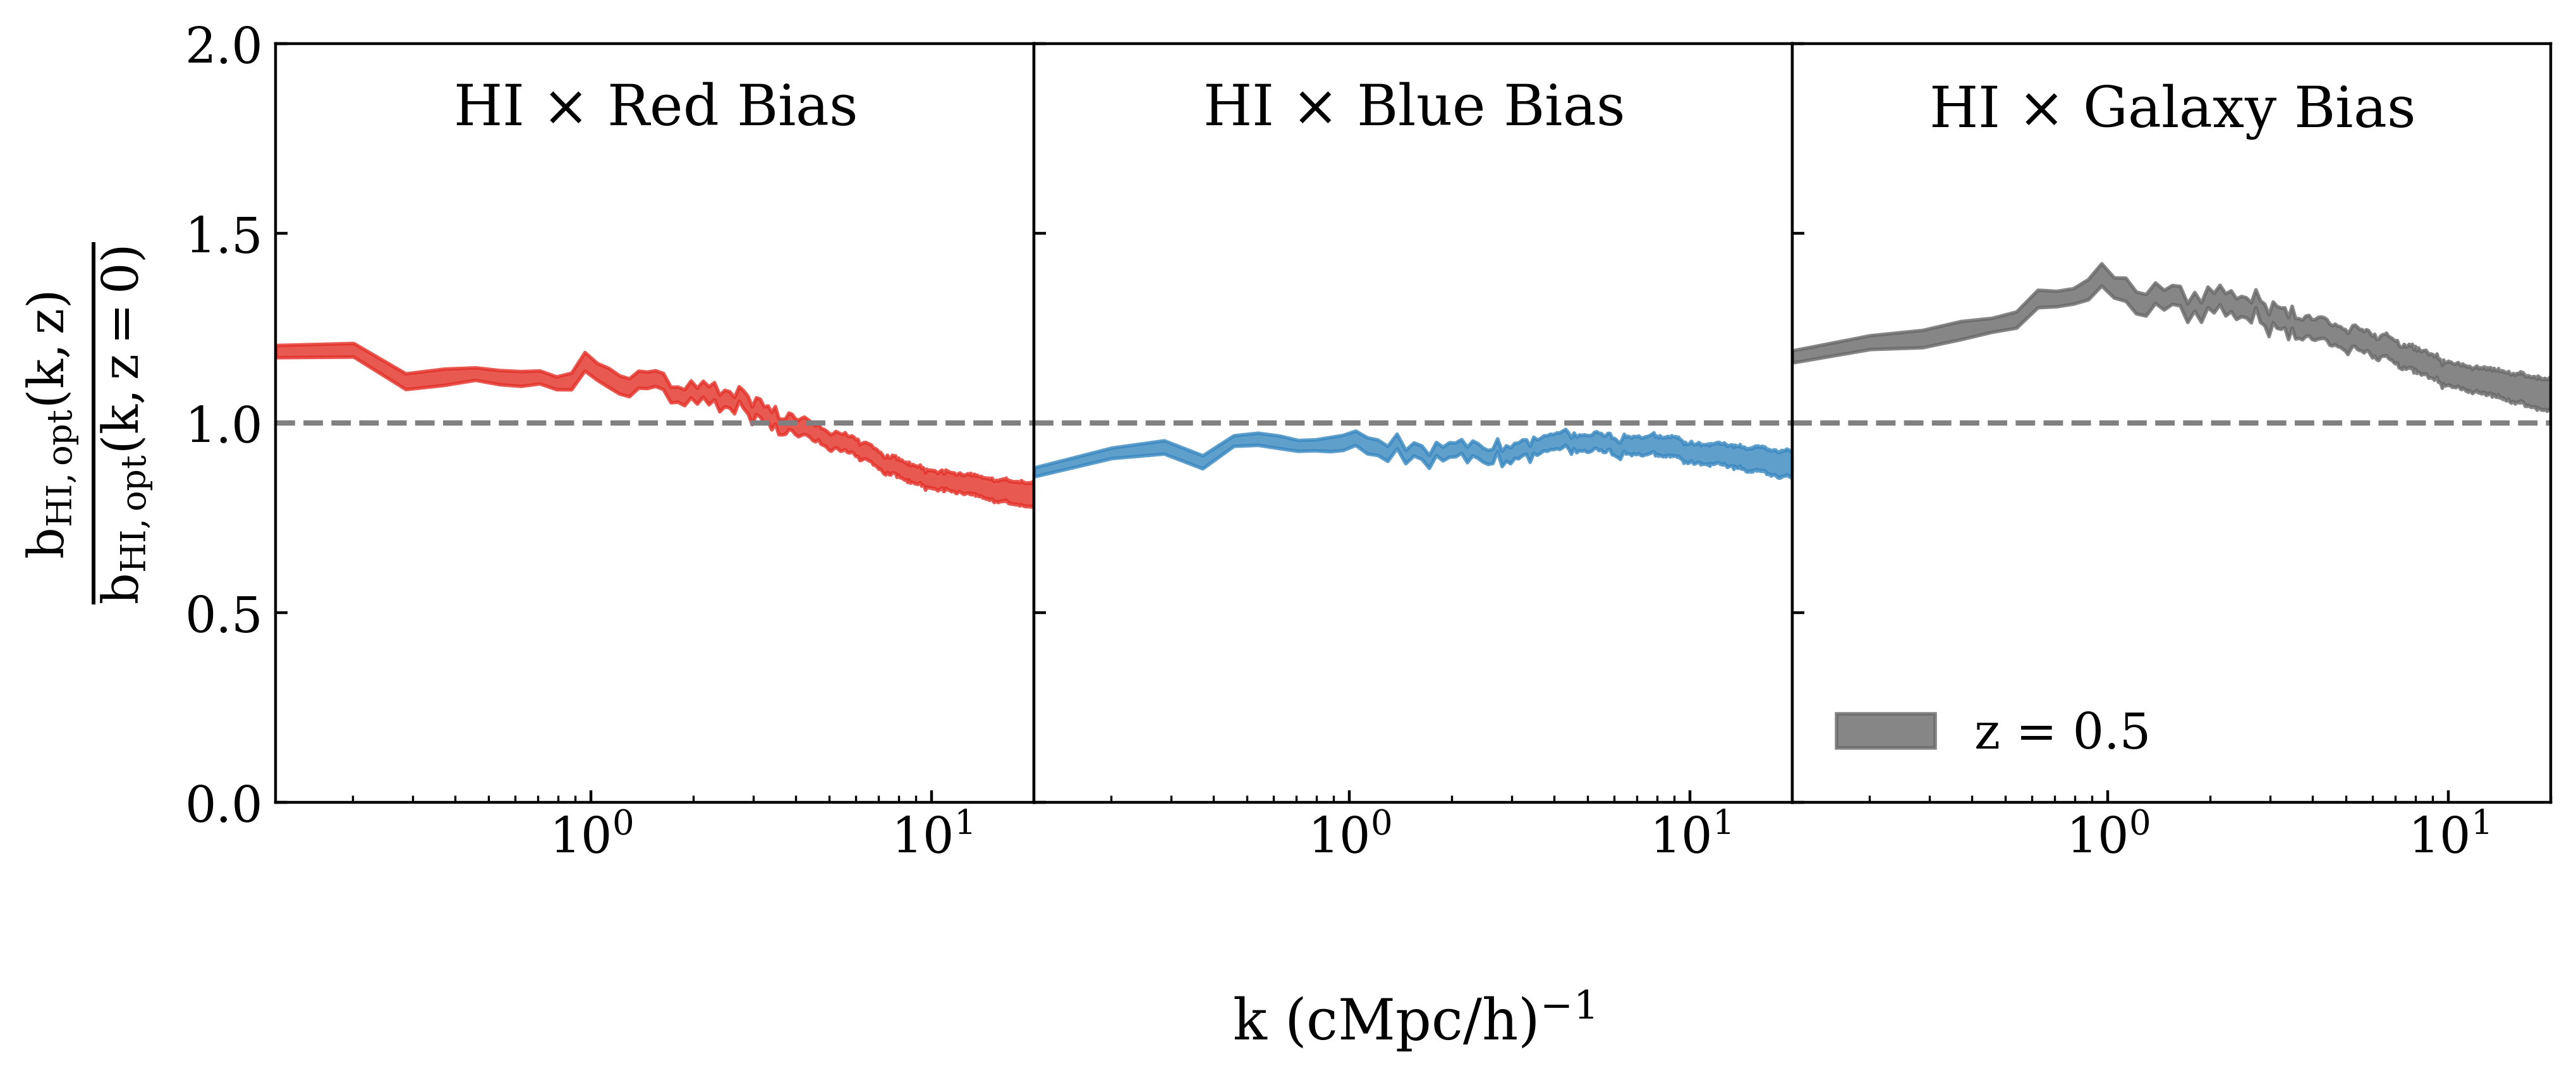

In [5]:

fg = ds.figrid('snapshot', '', 'color', ip, figrid_args = {'wspace':0})
fg.autoNorm(99, ['model', 'HI_fieldname'])
colors = ip['color']
snapshots = copy.copy(ip['snapshot'])
snapshots.reverse()
resolvedcols = seaborn.color_palette('Greys', len(snapshots))
redcols = seaborn.color_palette('Reds', len(snapshots))
bluecols = seaborn.color_palette('Blues', len(snapshots))
plotcolors = {'resolved':resolvedcols, 'blue':bluecols, 'red':redcols}
for c in colors:
    for s in range(len(snapshots)):
        if not snapshots[s] == 99:
            fip = {'color':c, 'snapshot':snapshots[s]}
            fg.fill(fip, {'alpha':0.8, 'color':plotcolors[c][s]})
fg.plotArgs({'snapshot':99}, {'visible':False, 'label':'__nolegend__'})
fg.setXLabel(XLAB)
fg.setYLabel(r"$\frac{\rm{b}_{\rm{HI, opt}} (k, z)}{\rm{b}_{\rm{HI, opt}} (k, z=0)}$", txtargs = {'fontsize':20})
fg.setDefaultTicksParams()
fg.axisArgs({'yscale':'linear', 'ylim':(0, 2)})
fg.legendArgs({'loc':'lower left'}, (0,2))
fg.plotOnes()
fg.plot()
fg.save("HI-galaxy_bias_snapshot_colorR_ratio.png")
fg.save(DRAFTPATH%"HI-galaxy_bias_snapshot_colorR_ratio.pdf")